In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gather_dicts():
    """Gathers json files into a master dictionary
    for analysis.
    """

    # instantiate master dict
    _dict = {}

    filelist = os.listdir('data/')
    filelist.sort(key=lambda x: int(re.sub('\D', '', x)))

    for i in filelist:
          
        filepath = os.path.join('data/', i)
        with open(filepath) as fp:
            _json = json.load(fp)
            
        # get name for naming each dict
        name = i.split('.')[0]        
        _dict[name] = _json
     
    return(_dict)

In [3]:
# Fix previous computer values one by one

#_dict['test6']['computer'] = _dict['test7']['computer']
#
#with open('data/test6.json', 'w') as fp:
#    json.dump(_dict['test6'], fp, indent=4)

In [4]:
# get master dict
_dict = gather_dicts()

# convert to a master df
df = pd.DataFrame.from_dict(_dict)

# the master df is a series of dicts
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 450 G5
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...","{'time': ['19:10:53', '19:12:59', '19:13:24', ..."
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,2020-06-10
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,upper west


In [5]:
# each test's data can be converted to a df
test1 = pd.DataFrame.from_dict(df['test1']['data'])
test1

,time,download,upload
0,12:03:59,99.751580,4.588742
1,12:07:13,69.165935,5.515696
2,12:11:15,82.097260,3.592372
3,12:15:19,76.162253,6.511090
4,12:19:53,49.996191,4.993106
5,12:24:15,80.555113,5.375524
6,12:25:55,132.313207,4.940173
7,12:27:09,118.668693,5.650967
8,12:29:03,97.323495,5.672564
9,12:34:15,88.024754,6.971582


In [6]:
def plot_single(df, col):
    """Plots speeds, given a test.
    """

    plt.rcParams['figure.figsize'] = [10, 5]
    plt.ylim(0, 140)
    
    title = ' - '.join([col.upper(),
                        df[col]['location'],
                        df[col]['day'],
                        df[col]['computer']])
    
    xlab = df[col]['data']['time']
    Y1 = df[col]['data']['download']
    Y2 = df[col]['data']['upload']

    mn = np.mean(Y1)
    plt.axhline(y=mn, color='r'
                , linestyle='--'
                , linewidth=1
                , label='avg download speed'
               )
    
    plt.xticks(range(10), xlab, rotation='vertical')
    plt.plot(Y1, label='download')
    plt.plot(Y2, label='upload')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    
    plt.ylabel('Mbps')
    plt.show()

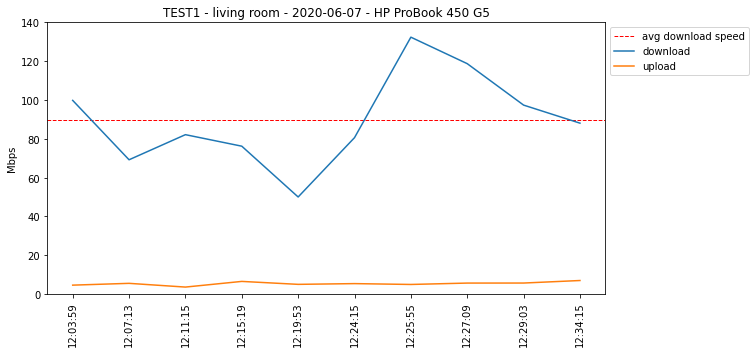

In [7]:
plot_single(df, 'test1')

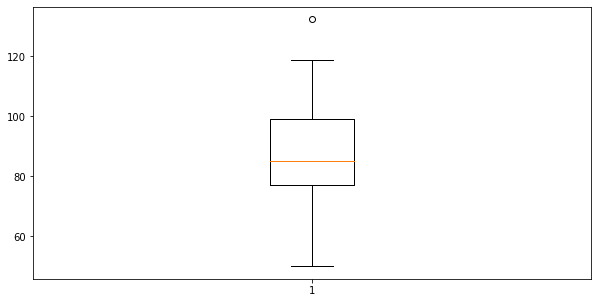

In [8]:
data = np.array(df['test1']['data']['download'])
plt.boxplot(data);


In [9]:
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 450 G5
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...","{'time': ['19:10:53', '19:12:59', '19:13:24', ..."
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,2020-06-10
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,upper west


In [54]:
lists = []
names = []
locs = []

for i in df.columns:
    lists.append(df[i]['data']['download'])
    locs.append(df[i]['location'])
    names.append(i)
np.transpose(lists)
data = pd.DataFrame(np.transpose(lists), columns=locs)

In [55]:
data

,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,upper west
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672,68.162876
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280,70.696012
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744,102.267763
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649,75.814819
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984,88.103700
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930,106.856534
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007,35.889676
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574,55.533975
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818,63.768312
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466,35.120300


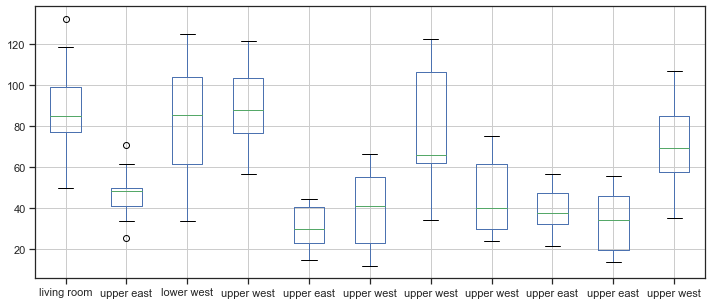

In [63]:
import seaborn
seaborn.set(style="ticks")
fig, ax = plt.subplots(ncols=1, figsize=(12,5))
data.boxplot();